In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cleaned_categories = pd.read_excel("cleaning_data/manually_worked_categories.xlsx", header = 1, dtype={'Count':int})
categories_trans = pd.read_excel("cleaning_data/categories_trans.xlsx", header = 0)

In [4]:
categories_trans.head()

,categories_fr,categories
0,Produits laitiers,Dairy products
1,Aliments et boissons à base de végétaux,Plant based products
2,Boissons,Drinks
3,Plats préparés,Ready meals
4,Produits fermentés,Fermented products


In [5]:
cleaned_categories.head()

,categories,Count,category_main_fr,category_main
0,Produits laitiers,41,Produits laitiers,NaN
1,Aliments et boissons à base de végétaux,40,Aliments et boissons à base de végétaux,NaN
2,Aliments d'origine végétale,37,Aliments et boissons à base de végétaux,NaN
3,Frais,33,Surgelés,NaN
4,Boissons,31,Boissons,NaN


In [6]:
for i, row in categories_trans.iterrows():
    cleaned_categories.loc[cleaned_categories['category_main_fr']==row['categories_fr'], 'category_main'] = row['categories']
    

In [7]:
cleaned_categories.to_csv("cleaning_data/cleaned_categories.csv")

In [8]:
categories_db = cleaned_categories.groupby('category_main').agg({'Count': 'sum', 'categories': lambda x: ', '.join(x)})

In [9]:
categories_db = categories_db.sort_values('Count').reset_index()
categories_db

,category_main,Count,categories
0,Dried fruits and nuts,3,"Cranberries sucrées et séchées, Figues sèches,..."
1,Fruits,6,"salade de fruits, Fruits frais, Kirschen, Toma..."
2,Vegetables,6,"Légumes, Vegetables, Coeurs d'artichauts, Légu..."
3,Condiments,7,"Condiments, Paprika, Piments, Epices, Assaison..."
4,Honeys,10,"Produits de la ruche, Miels, Miels liquides, M..."
5,Oils,14,"Huiles d'olive, Huiles, Olive oils, Vegetable ..."
6,Fermented products,19,Produits fermentés
7,Tee and infusions,20,"Infusions, Thés, Thés verts étuvés, Thés verts..."
8,Baby food,22,"Babynahrung, Compotes, Compotes de pomme, Comp..."
9,Canned products,24,"Conserves, Canned foods, Légumes en conserve, ..."


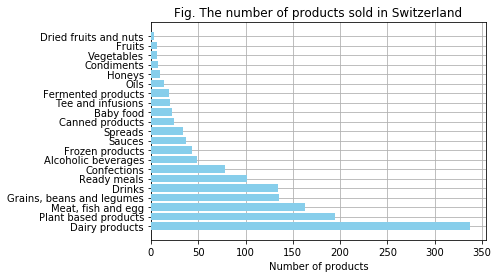

In [10]:
# Plot the most frequent categories
fig, ax = plt.subplots()
ax.grid(zorder=-1)
plt.barh(categories_db.category_main, categories_db.Count, zorder=3, color='skyblue')
plt.xlabel('Number of products')   
plt.title('Fig. The number of products sold in Switzerland')
ax.invert_yaxis() 
plt.savefig('swiss_plot.png')
plt.show()

In [89]:
categories_db.to_csv("cleaning_data/categories_db.csv")